In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 1.1.0
numpy: 1.15.4
matplotlib: 2.2.2
pandas: 1.0.0
sklearn: 0.19.1


In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
train_dataset = pd.read_csv('train.csv.zip')
train_dataset.head(5)

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [4]:
test_dataset = pd.read_csv('test.csv.zip')
test_dataset.head(5)

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

## Primer modelo 15 variables con más correlación

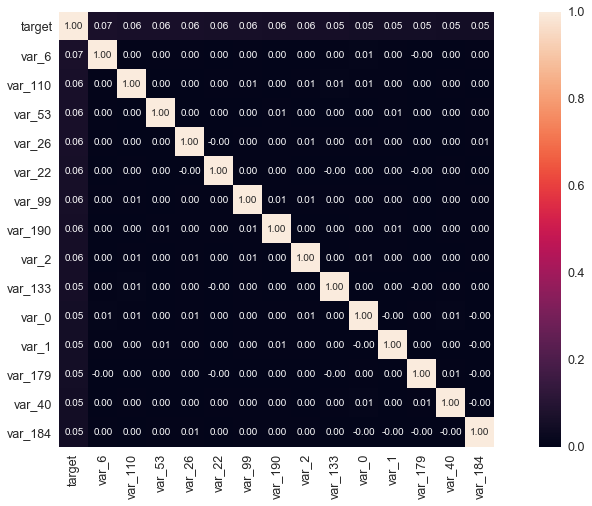

In [5]:
#target correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = train_dataset.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(train_dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [6]:
# loop inside a new features
H_features = []
for c in cols:
    H_features.append(c)
H_features

['target',
 'var_6',
 'var_110',
 'var_53',
 'var_26',
 'var_22',
 'var_99',
 'var_190',
 'var_2',
 'var_133',
 'var_0',
 'var_1',
 'var_179',
 'var_40',
 'var_184']

In [7]:
# create new model dataset for second part
features_dataset_1 = train_dataset[H_features]
features_dataset_1.head(10)

target   var_6  var_110  var_53   var_26   var_22  var_99  var_190  \
0       0  5.1187   2.0323  5.1736  -5.1488   2.5791 -3.4132   4.4354   
1       0  5.6208   6.6203  6.6885 -11.7684   8.5524  0.6939   7.6421   
2       0  6.9427   3.2304  6.4059  -7.9940   1.2145 -0.0269   2.9057   
3       0  5.8428   4.2827  5.2091   0.8135   6.8202  1.9480   4.4666   
4       0  5.9405  -0.1937  5.7555   3.1736  10.1102  0.6715  -1.4905   
5       0  4.5322   7.0040  5.2399  -1.2796   1.0468  0.0886  -6.3068   
6       0  6.1961  11.6967  5.2735  -0.5156   8.1159  0.0483   8.7830   
7       0  5.6890   2.5181  6.6503   3.3883   1.2375  2.2442  13.1700   
8       0  4.4514   8.5274  7.3927 -14.4918   6.5580 -0.4049   1.4298   
9       0  6.0637  -0.2992  5.9517  -3.2200   6.1695 -3.1096   0.5543   

     var_2  var_133    var_0   var_1  var_179   var_40  var_184  
0  11.9081   6.5674   8.9255 -6.7863   1.7202  -5.2387  25.8398  
1  13.8588   7.0513  11.5006 -4.1473  11.0752 -11.1147  22.5441  
2  12.0805   6.6231   8.6093 -2.7457   2.4013 -13.5174  23.0866  
3   8.9522   7.1954  11.0604 -2.1518   5.6961  -3.8294  -0.4639  
4  12.8746   6.6173   9.8369 -1.4834   5.1743  -5.5963  11.8503  
5  12.6080   6.6143  11.4763 -2.3182   1.0208   2.6553  21.0550  
6   9.3494   7.4506  11.8091 -0.0832   3.8973   4.4616  11.9140  
7  13.8776   7.0754  13.5580 -7.9881   0.0592 -12.0219  24.0369  
8  13.9307   6.8742  16.1071  2.4426  -2.1408  -5.1399  -1.7937  
9   8.8960   6.9338  12.5088  1.9743   2.3910 -17.9593  19.0645

In [8]:
# show the new dataset with 15 features
features_dataset_1.shape

(200000, 15)

In [ ]:
# Split and drop Churn variable
X_train = features_dataset_1.drop('target', axis=1)
Y_train = features_dataset_1['target']

# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)


# Modeling step Test differents algorithms 
random_state = 2

models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(ExtraTreesClassifier(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))
models.append(LinearDiscriminantAnalysis())
models.append(MLPClassifier(random_state=random_state))


for model in models :
    cv_results.append(cross_val_score(model, X_train, Y_train, 
                                      scoring = "accuracy", cv = K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "ExtraTrees",
                     "SVC",
                     "GradientBoosting",                      
                     "LogisticRegression",
                     "LinearDiscriminantAnalysis",
                     "MultipleLayerPerceptron"]
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

In [9]:
# Split and drop Churn variable
X_train = features_dataset_1.drop('target', axis=1)
y_train = features_dataset_1['target']

# Create train and test 80-20 with seed fixed to 42 for validation the model
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160000, 14), (160000,), (40000, 14), (40000,))

In [11]:
# Create a performance_auc dict
performance_auc = {}

In [12]:
# Logistic Regression
model = LogisticRegression().fit(X_train, y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
predicted_log = model.predict(X_test)
predicted_log

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
# Confidence score
logreg_score_1 = round(model.score(X_train,y_train) * 100, 2)

print(logreg_score_1)

print(classification_report(y_test, predicted_log))

90.02
             precision    recall  f1-score   support

          0       0.90      1.00      0.95     35903
          1       0.65      0.00      0.01      4097

avg / total       0.87      0.90      0.85     40000



<module 'matplotlib.pyplot' from '/Users/Marco/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

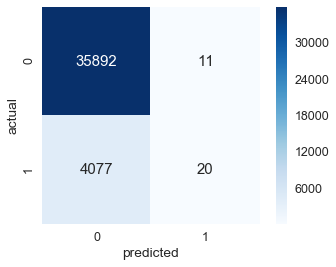

In [15]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

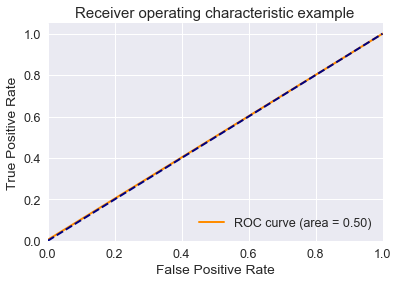

In [16]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log)
roc_auc = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted_log))
print('MSE:', metrics.mean_squared_error(y_test, predicted_log))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_log)))

MAE: 0.1022
MSE: 0.1022
RMSE: 0.3196873472629156


In [18]:
# Decision Tree
model = DecisionTreeClassifier().fit(X_train, y_train)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
predicted_dt = model.predict(X_test)
predicted_dt

array([0, 1, 0, ..., 0, 0, 0])

In [20]:
# Confidence score
dectree_score_1 = round(model.score(X_train,y_train) * 100, 2)
print(dectree_score_1)
print(classification_report(y_test, predicted_dt))

100.0
             precision    recall  f1-score   support

          0       0.91      0.89      0.90     35903
          1       0.16      0.18      0.17      4097

avg / total       0.83      0.82      0.82     40000



<module 'matplotlib.pyplot' from '/Users/Marco/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

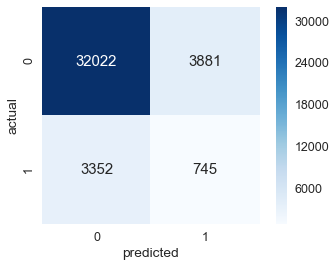

In [21]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_dt)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

In [22]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_dt)
roc_auc = auc(fpr, tpr)
performance_auc['Decision Tree'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [23]:
pd.concat((pd.DataFrame(X_train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(model.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

variable  importance
5   var_190    0.075237
4    var_99    0.074416
10  var_179    0.073940
2    var_26    0.073686
0   var_110    0.073033
9     var_1    0.072387
1    var_53    0.071166
8     var_0    0.070398
7   var_133    0.070364
3    var_22    0.070150
13      NaN    0.069813
11   var_40    0.068929
6     var_2    0.068754
12  var_184    0.067727

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted_dt))
print('MSE:', metrics.mean_squared_error(y_test, predicted_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_dt)))

MAE: 0.180825
MSE: 0.180825
RMSE: 0.42523522902036237


In [25]:
# Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train)
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
predicted_rf = model.predict(X_test)
predicted_rf

array([0, 0, 0, ..., 0, 0, 0])

<module 'matplotlib.pyplot' from '/Users/Marco/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

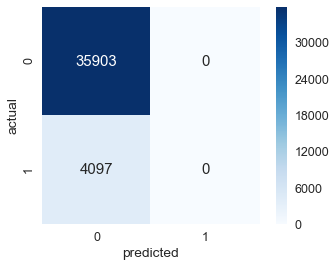

In [27]:
matrix = confusion_matrix(y_test, predicted_rf)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

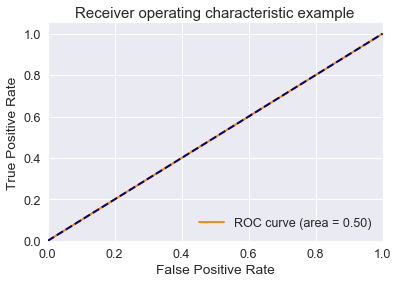

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_rf)
roc_auc = auc(fpr, tpr)
performance_auc['Random Forests'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [29]:
pd.concat((pd.DataFrame(X_train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(model.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

variable  importance
2    var_26    0.222388
3    var_22    0.194099
1    var_53    0.157398
4    var_99    0.104681
0   var_110    0.069537
8     var_0    0.056389
11   var_40    0.050109
5   var_190    0.042182
9     var_1    0.029544
7   var_133    0.028181
6     var_2    0.017010
12  var_184    0.016547
10  var_179    0.009978
13      NaN    0.001958

In [30]:
# KNN
model = KNeighborsClassifier(3).fit(X_train, y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [31]:
predicted_knn = model.predict(X_test)
predicted_knn

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
# Confidence score
knn_score_1 = round(model.score(X_train,y_train) * 100, 2)
print(knn_score_1)
print(classification_report(y_test, predicted_knn))

91.41
             precision    recall  f1-score   support

          0       0.90      0.98      0.94     35903
          1       0.20      0.05      0.07      4097

avg / total       0.83      0.88      0.85     40000



<module 'matplotlib.pyplot' from '/Users/Marco/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

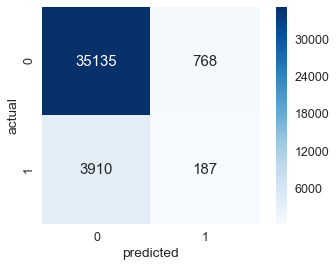

In [33]:
matrix = confusion_matrix(y_test, predicted_knn)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

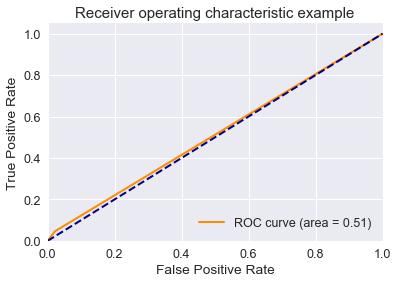

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_knn)
roc_auc = auc(fpr, tpr)
performance_auc['k-nearest neighbours'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# SVM
model = SVC(probability=True).fit(X_train, y_train)
model

In [ ]:
predicted_sv = model.predict(X_test)
predicted_sv

In [ ]:
# Confidence score
svm_score_1 = round(model.score(X_train,y_train) * 100, 2)
print(svm_score_1)
print(classification_report(y_test, predicted_sv))

In [ ]:
matrix = confusion_matrix(y_test, predicted_sv)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_sv)
roc_auc = auc(fpr, tpr)
performance_auc['SVM'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
perf = pd.DataFrame.from_dict(performance_auc, orient='index')
perf['Model'] = perf.index
perf['AUC'] = perf[0]
plt.xlabel('AUC')
plt.title('Classifier AUC')
sns.set_color_codes("muted")
sns.barplot(x='AUC', y='Model', data=perf, color="b")

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Score_1st': [svm_score_1, 
              knn_score_1, 
              logreg_score_1, 
              randfor_score_1,
              dectree_score_1 ]})
models.sort_values(by='Score_1st', ascending=False)

In [ ]:
# Submission
ID_code = test_dataset['ID_code']

Predictive_Model = pd.DataFrame({
        "ID_code": ID_code,
        "target": VotingPredictor.predict(test)})

Predictive_Model.to_csv('submission_1.csv', index=False)